In [2]:
!pip install gekko --upgrade

     |████████████████████████████████| 12.3MB 246kB/s 


apm 34.73.194.135_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           1043
 Number of total equations: -          894
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            149
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

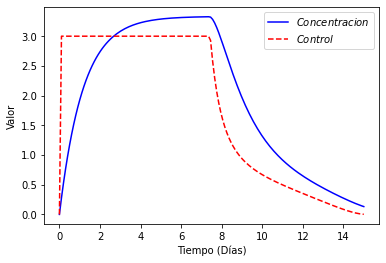

In [10]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
 
m = GEKKO()
nt = 150
m.time = np.linspace(0, 15, nt)
 
 
#Variables
 
x1 = m.Var(value=2e7)
x2 = m.Var(value=0)
x3 = m.Var(value=0)
u = m.Var(value=0, lb=0, ub=3)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)
 
#Ecuaciones
m.Equation(x1.dt() == 4.31e-1*x1 - 0.9*x1*x2)
m.Equation(x2.dt() == -0.9*x2 + u)
m.Equation(x3.dt() == x1 + 0.5*u**2)
m.Obj(x3 * final)
m.options.IMODE = 6
m.solve()
plt.figure(1)
#plt.plot(m.time, x1.value, 'k-', label=r"$Tumorales$")
plt.plot(m.time, x2.value, 'b-', label=r"$Concentracion$")
plt.plot(m.time, u.value, 'r--', label=r"$Control$")
plt.legend(loc="best")
plt.xlabel("Tiempo (Días)")
plt.ylabel("Valor")
#plt.ylim(0, 2)
plt.show()